The following datasets are available:

1. Profile Information on Users/Bots Classification 
2. Profile Information on Users who Tweeted about COVID
3. COVID-related tweets
4. COVID-user classified to human or bot



In [469]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
%matplotlib inline
from collections import Counter
plt.rcParams["figure.figsize"] = [10, 7]
import warnings
warnings.filterwarnings("ignore")

In [292]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [295]:
from nltk.corpus import stopwords

In [306]:
user_bots = pd.read_csv("../data_consolidation/consolidated_version2.csv")
print("User Bots Dimensions", user_bots.shape)
covid_user = pd.read_csv("../data_consolidation/covid_user_info.csv", lineterminator='\n')
print("COVID-related User Information", covid_user.shape)
covid_tweets = pd.read_csv("../data_consolidation/2020-03-18 Coronavirus Tweets.CSV")
print("COVID-related Tweets", covid_tweets.shape)

User Bots Dimensions (63264, 17)
COVID-related User Information (22998, 20)
COVID-related Tweets (626206, 22)


In [399]:
covid_user_lab = pd.read_csv("../Exploring-Features/COVID_prediction.csv")
print("COVID-user classified", covid_user_lab.shape)

COVID-user classified (15489, 10)


In [108]:
user_bots.drop(columns=['Unnamed: 0'], inplace=True)
covid_user.drop(columns=['Unnamed: 0'], inplace=True)
#covid_tweets.drop(columns=['Unnamed: 0'], inplace=True)

## Looking at the Bots/User classified dataset.

In [109]:
user_bots.source.value_counts()

midterm_18                50538
social_spambots2           3457
gilani_2017                2503
verified_2019              1987
traditional_spambots_4     1128
traditional_spambots_1     1000
social_spambots1            991
cresci-rtbust-2019          693
social_spambots3            464
traditional_spambots_3      403
traditional_spambots_2      100
Name: source, dtype: int64

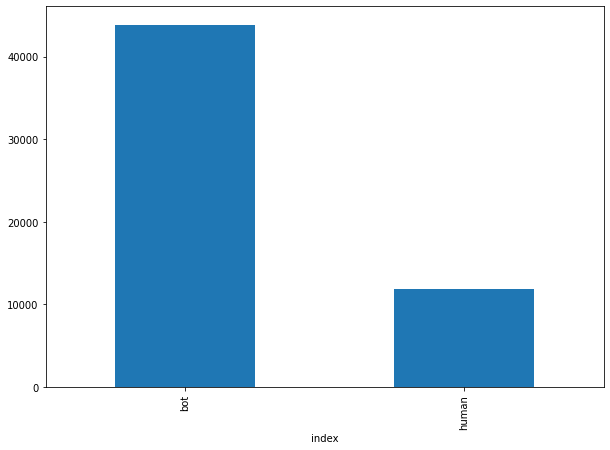

In [117]:
count = user_bots.bot.value_counts().reset_index()
count.plot(x='index', y='bot', kind='bar', legend=False)


In [118]:
user_bots.columns

Index(['id', 'bot', 'description', 'probe_timestamp', 'created_at', 'lang',
       'protected', 'verified', 'geo_enabled', 'default_profile',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'statuses_count', 'source'],
      dtype='object')

Average Number of Statuses by Bot Classification:

In [155]:
user_bots.groupby('bot')['statuses_count'].mean()

bot
bot       3843.206680
human    20338.741633
Name: statuses_count, dtype: float64

Average Number of Followers and Friends by Bot Classification:

In [158]:
user_bots.groupby('bot')['followers_count'].mean()

bot
bot       19041.989154
human    203560.846941
Name: followers_count, dtype: float64

In [159]:
user_bots.groupby('bot')['friends_count'].mean()

bot
bot       776.796692
human    3219.274594
Name: friends_count, dtype: float64

Visualizing dates when accounts were created

In [239]:
user_bots['datetime'] = pd.to_datetime(user_bots[user_bots['source']!= 'traditional_spambots_1'].created_at)

## Looking at the Covid-related User dataset

Followers Summary

In [263]:
covid_user.followers.describe()

count    2.299800e+04
mean     2.187226e+04
std      3.771802e+05
min      0.000000e+00
25%      1.280000e+02
50%      5.390000e+02
75%      2.337500e+03
max      2.194947e+07
Name: followers, dtype: float64

Friends (Following) Summary

In [265]:
covid_user.following.describe()

count     22998.000000
mean       1909.240543
std        9477.853939
min           0.000000
25%         212.000000
50%         603.000000
75%        1623.000000
max      659861.000000
Name: following, dtype: float64

In [268]:
covid_user.columns

Index(['avatar', 'background_image', 'bio', 'followers', 'following',
       'join_date', 'join_datetime', 'join_time', 'likes', 'location', 'media',
       'name', 'private', 'retrieved_info', 'tweets', 'url', 'user_id',
       'username', 'verified'],
      dtype='object')

Basic Analysis of Twitter Bios:

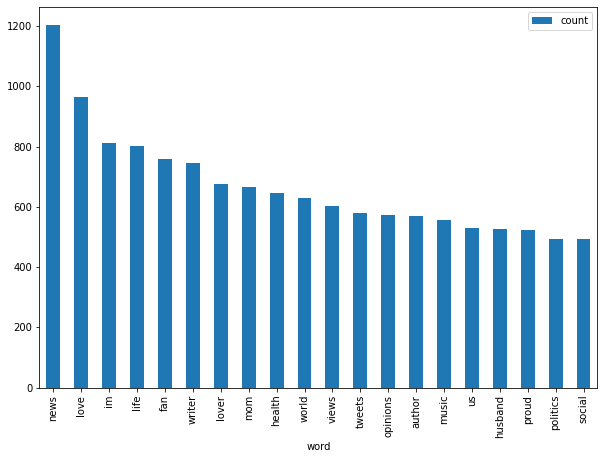

In [458]:
covid_user['bio'] = covid_user['bio'].fillna("")

covid_user["bio_dup"] = covid_user['bio'].str.replace('[^\w\s]','')
covid_user['bio_dup'] = covid_user['bio_dup'].str.lower()
covid_user['bio_dup'] = covid_user['bio_dup'].replace(',','', regex=True)
covid_user['bio_dup'] = covid_user['bio_dup'].replace('#','', regex=True)

covid_user['tokenized_sents'] = covid_user.apply(lambda row: nltk.word_tokenize(row['bio_dup']), axis=1)

stop = stopwords.words('english')

covid_user['words'] = covid_user.tokenized_sents.apply(lambda x: [item for item in x if item not in stop])

full_list = []  # list containing all words of all texts
for elmnt in covid_user['words']:  # loop over lists in df
    full_list += elmnt  # append elements of lists to full list

val_counts = pd.Series(full_list).value_counts()
val_counts = val_counts.reset_index()
col = val_counts.columns[1]
col1 = val_counts.columns[0]
val_counts = val_counts.rename(columns={col: "count", col1: "word"})
sub_val_counts = val_counts.head(20)
sub_val_counts.plot.bar(x='word', y='count', rot=90)

## Looking at Covid Tweets merged with Bots

Looking at Classified value counts

In [415]:
covid_user_lab.prediction.value_counts()

0    13078
1     2411
Name: prediction, dtype: int64

In [418]:
covid_tweets.columns

Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')

Merging with Tweets

In [419]:
covid_user_lab = covid_user_lab.rename(columns={"username": "screen_name"})

In [421]:
cov_lab_tweet = pd.merge(covid_user_lab, covid_tweets, on="screen_name")

Tweets made by Bot and Human accounts:

In [423]:
cov_lab_tweet.prediction.value_counts()

0    31540
1     8074
Name: prediction, dtype: int64

In [424]:
cov_bot_tweets = cov_lab_tweet[cov_lab_tweet['prediction'] == 1]

In [428]:
cov_bot_tweets = cov_bot_tweets[cov_bot_tweets['verified_x'] != 1]

In [454]:
tweet_count = cov_bot_tweets.groupby('screen_name')['text'].count().sort_values(ascending=False).reset_index()
tweet_count = tweet_count.head(20)

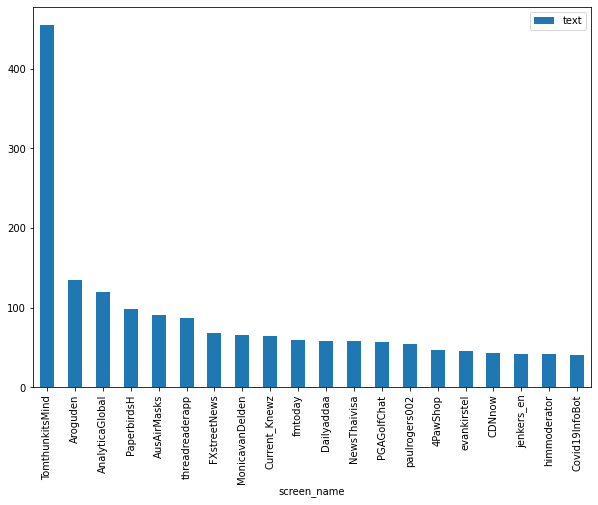

In [457]:
tweet_count.plot.bar(x='screen_name', y='text', rot=90)

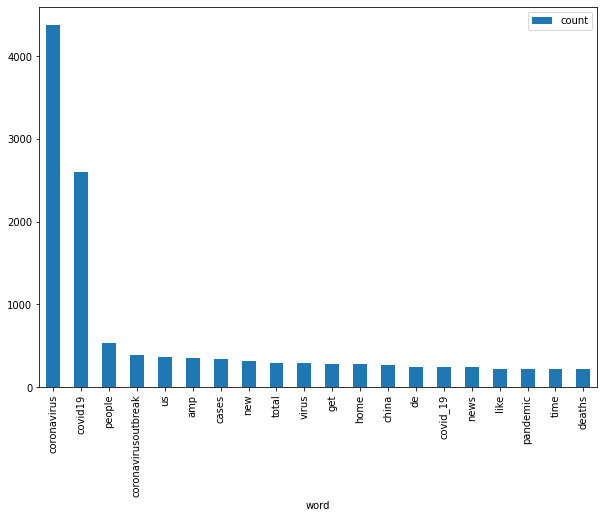

In [471]:
cov_bot_tweets['text'] = cov_bot_tweets['text'].fillna("")

cov_bot_tweets["text_dup"] = cov_bot_tweets['text'].str.replace('[^\w\s]','')
cov_bot_tweets['text_dup'] = cov_bot_tweets['text_dup'].str.lower()
cov_bot_tweets['text_dup'] = cov_bot_tweets['text_dup'].replace(',','', regex=True)
cov_bot_tweets['text_dup'] = cov_bot_tweets['text_dup'].replace('#','', regex=True)
#cov_bot_tweets['text_dup'] = cov_bot_tweets['text_dup'].replace('covid19','', regex=True)
#cov_bot_tweets['text_dup'] = cov_bot_tweets['text_dup'].replace('coronavirus','', regex=True)

cov_bot_tweets['tokenized_sents'] = cov_bot_tweets.apply(lambda row: nltk.word_tokenize(row['text_dup']), axis=1)

stop = stopwords.words('english')

cov_bot_tweets['words'] = cov_bot_tweets['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])

full_list = []  # list containing all words of all texts
for elmnt in cov_bot_tweets['words']:  # loop over lists in df
    full_list += elmnt  # append elements of lists to full list

val_counts = pd.Series(full_list).value_counts()
val_counts = val_counts.reset_index()
col = val_counts.columns[1]
col1 = val_counts.columns[0]
val_counts = val_counts.rename(columns={col: "count", col1: "word"})
sub_val_counts = val_counts.head(20)
sub_val_counts.plot.bar(x='word', y='count', rot=90)

Check to see if ANY of the tweets contain these domains: https://www.newsguardtech.com/coronavirus-misinformation-tracking-center/ *Word doc added to git*